In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [8]:
df_train = pd.read_csv('monks-1.train', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df_train

,class,a1,a2,a3,a4,a5,a6,ID
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
119,1,3,3,2,1,4,2,data_416
120,1,3,3,2,3,1,2,data_426
121,1,3,3,2,3,2,2,data_428
122,1,3,3,2,3,3,2,data_430


In [9]:
df_test = pd.read_csv('monks-1.test', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df_test

,class,a1,a2,a3,a4,a5,a6,ID
0,1,1,1,1,1,1,1,data_1
1,1,1,1,1,1,1,2,data_2
2,1,1,1,1,1,2,1,data_3
3,1,1,1,1,1,2,2,data_4
4,1,1,1,1,1,3,1,data_5
...,...,...,...,...,...,...,...,...
427,1,3,3,2,3,2,2,data_428
428,1,3,3,2,3,3,1,data_429
429,1,3,3,2,3,3,2,data_430
430,1,3,3,2,3,4,1,data_431


In [11]:
X_df_train = df_train.drop(['class', 'ID'], axis=1)
X_df_train = pd.get_dummies(X_df_train, columns=X_df_train.columns)
y_df_train = df_train[['class']]

X_train = torch.from_numpy(X_df_train.to_numpy(dtype=np.float32))
y_train = torch.from_numpy(y_df_train.to_numpy(dtype=np.float32))

print(X_train.shape, y_train.shape)

torch.Size([124, 17]) torch.Size([124, 1])


In [12]:
X_df_test = df_test.drop(['class', 'ID'], axis=1)
X_df_test = pd.get_dummies(X_df_test, columns=X_df_test.columns)
y_df_test = df_test[['class']]

X_test = torch.from_numpy(X_df_test.to_numpy(dtype=np.float32))
y_test = torch.from_numpy(y_df_test.to_numpy(dtype=np.float32))

print(X_test.shape, y_test.shape)

torch.Size([432, 17]) torch.Size([432, 1])


In [15]:
def weights_init_uniform_fan_in(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        fan_in = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-fan_in, fan_in)
        m.bias.data.fill_(0)


Epoch is 0   | MSE Loss: 1.0273098945617676     | Test MSE loss: 1.0156457424163818    
Epoch is 10  | MSE Loss: 0.8773370385169983     | Test MSE loss: 0.8634212017059326    
Epoch is 20  | MSE Loss: 0.741877019405365      | Test MSE loss: 0.7264323830604553    
Epoch is 30  | MSE Loss: 0.6257496476173401     | Test MSE loss: 0.6095913052558899    
Epoch is 40  | MSE Loss: 0.5309454798698425     | Test MSE loss: 0.5147927403450012    
Epoch is 50  | MSE Loss: 0.45667415857315063    | Test MSE loss: 0.4410751461982727    
Epoch is 60  | MSE Loss: 0.400350421667099      | Test MSE loss: 0.38569697737693787   
Epoch is 70  | MSE Loss: 0.3586709201335907     | Test MSE loss: 0.34523653984069824   
Epoch is 80  | MSE Loss: 0.3283343017101288     | Test MSE loss: 0.3163035809993744    
Epoch is 90  | MSE Loss: 0.30641284584999084    | Test MSE loss: 0.2959027588367462    
Epoch is 100 | MSE Loss: 0.29050323367118835    | Test MSE loss: 0.2815820574760437    
Epoch is 110 | MSE Loss: 0.27874

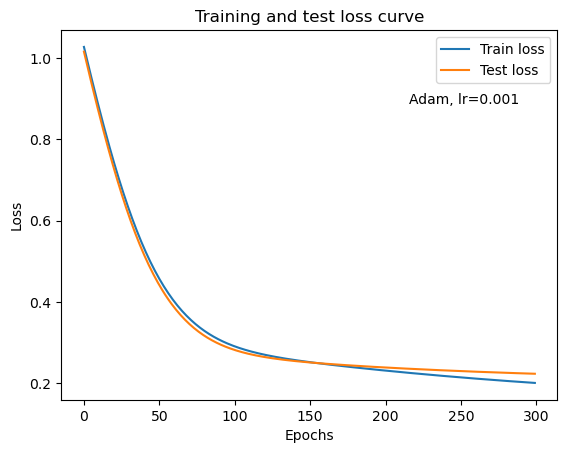

In [27]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=4),
    nn.Linear(in_features=4, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform_fan_in)

loss_fn = nn.MSELoss()

lr = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
        #test_accuracy = accuracy_score(y_test, test_pred)
        
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 10 == 0:
        print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"Adam, lr={lr}", xy=(0.7, 0.8), xycoords="axes fraction")
plt.legend();

Epoch is 0   | Loss: 0.7463432550430298     | Test loss: 0.7094986438751221    
Epoch is 5   | Loss: 0.7172430157661438     | Test loss: 0.6811773777008057    
Epoch is 10  | Loss: 0.6895347833633423     | Test loss: 0.6542774438858032    
Epoch is 15  | Loss: 0.6632088422775269     | Test loss: 0.628782331943512     
Epoch is 20  | Loss: 0.6382449865341187     | Test loss: 0.6046656966209412    
Epoch is 25  | Loss: 0.6146143674850464     | Test loss: 0.5818929672241211    
Epoch is 30  | Loss: 0.5922805666923523     | Test loss: 0.5604227781295776    
Epoch is 35  | Loss: 0.571201503276825      | Test loss: 0.5402085781097412    
Epoch is 40  | Loss: 0.5513308644294739     | Test loss: 0.5211998820304871    
Epoch is 45  | Loss: 0.5326189398765564     | Test loss: 0.5033436417579651    
Epoch is 50  | Loss: 0.5150138735771179     | Test loss: 0.48658525943756104   
Epoch is 55  | Loss: 0.4984627068042755     | Test loss: 0.47086912393569946   
Epoch is 60  | Loss: 0.4829120934009552 

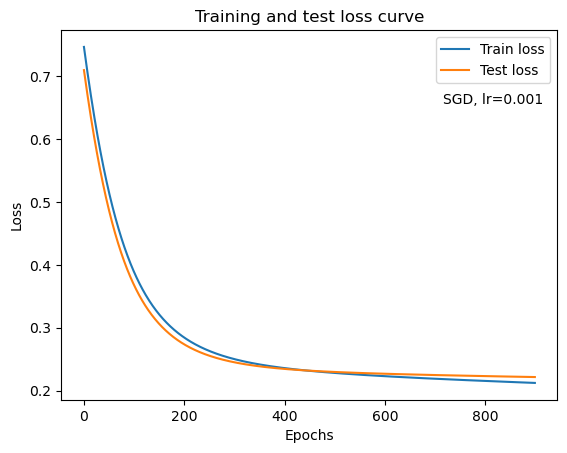

In [34]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=2),
    nn.Linear(in_features=2, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform_rule)

loss_fn = nn.MSELoss()

lr= 0.001
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 900

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 5 == 0:
        print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"SGD, lr={lr}", xy=(0.77, 0.8), xycoords="axes fraction")
plt.legend();

In [42]:
def weights_init_uniform(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # apply a uniform distribution to the weights and a bias=0
            m.weight.data.uniform_(0.0, 0.5)
            m.bias.data.fill_(0)

Epoch is 0   | MSE Loss: 0.46133628487586975    | Test MSE loss: 0.4593293368816376    
Epoch is 10  | MSE Loss: 0.44724076986312866    | Test MSE loss: 0.44447633624076843   
Epoch is 20  | MSE Loss: 0.4287022054195404     | Test MSE loss: 0.42488133907318115   
Epoch is 30  | MSE Loss: 0.4044753611087799     | Test MSE loss: 0.399247407913208     
Epoch is 40  | MSE Loss: 0.37388134002685547    | Test MSE loss: 0.3669436275959015    
Epoch is 50  | MSE Loss: 0.3378767669200897     | Test MSE loss: 0.3291788697242737    
Epoch is 60  | MSE Loss: 0.3001110553741455     | Test MSE loss: 0.2901172935962677    
Epoch is 70  | MSE Loss: 0.26654887199401855    | Test MSE loss: 0.2563537657260895    
Epoch is 80  | MSE Loss: 0.24217943847179413    | Test MSE loss: 0.23325997591018677   
Epoch is 90  | MSE Loss: 0.22691498696804047    | Test MSE loss: 0.22066938877105713   
Epoch is 100 | MSE Loss: 0.21660974621772766    | Test MSE loss: 0.21404756605625153   
Epoch is 110 | MSE Loss: 0.20806

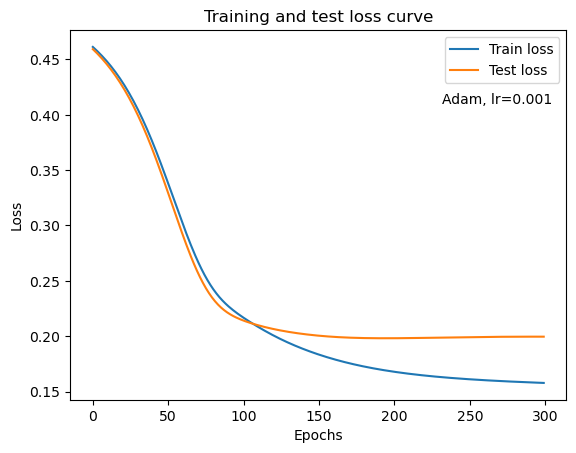

In [50]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=4),
    nn.Linear(in_features=4, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform)

loss_fn = nn.MSELoss()

lr = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
        #test_accuracy = accuracy_score(y_test, test_pred)
        
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 10 == 0:
        print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"Adam, lr={lr}", xy=(0.75, 0.8), xycoords="axes fraction")
plt.legend();

Epoch is 0   | Loss: 0.4328492283821106     | Test loss: 0.2637243866920471    
Epoch is 5   | Loss: 0.2584167420864105     | Test loss: 0.2594684958457947    
Epoch is 10  | Loss: 0.2563169598579407     | Test loss: 0.2581402659416199    
Epoch is 15  | Loss: 0.25439098477363586    | Test loss: 0.25693705677986145   
Epoch is 20  | Loss: 0.252575546503067      | Test loss: 0.255819171667099     
Epoch is 25  | Loss: 0.2508184015750885     | Test loss: 0.2547537386417389    
Epoch is 30  | Loss: 0.24907420575618744    | Test loss: 0.2537127435207367    
Epoch is 35  | Loss: 0.24730214476585388    | Test loss: 0.25267109274864197   
Epoch is 40  | Loss: 0.24546381831169128    | Test loss: 0.2516058087348938    
Epoch is 45  | Loss: 0.24352261424064636    | Test loss: 0.25049516558647156   
Epoch is 50  | Loss: 0.24144305288791656    | Test loss: 0.2493187040090561    
Epoch is 55  | Loss: 0.2391911745071411     | Test loss: 0.24805733561515808   
Epoch is 60  | Loss: 0.23673531413078308

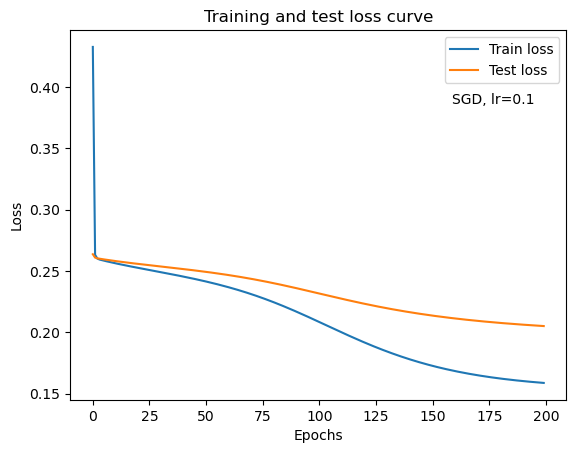

In [49]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=2),
    nn.Linear(in_features=2, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform)

loss_fn = nn.MSELoss()

lr= 0.1
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 5 == 0:
        print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"SGD, lr={lr}", xy=(0.77, 0.8), xycoords="axes fraction")
plt.legend();

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from torch import nn
from skorch import NeuralNetClassifier

X, y = make_classification(1000, 20, n_informative=10, random_state=0)
X_dev_1 = X_dev_1.astype(np.float32)
y_dev_1 = y_dev_1.astype(np.int64)

class MyModule(nn.Module):
    def __init__(self, num_units=10, nonlin=nn.ReLU()):
        super().__init__()

        self.dense0 = nn.Linear(20, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 2)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X

net = NeuralNetClassifier(
    MyModule,
    max_epochs=10,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

net.fit(X, y)
y_proba = net.predict_proba(X)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7020       0.5800        0.6855  0.0628
      2        0.6863       0.6100        0.6818  0.0115
      3        0.6829       0.6250        0.6799  0.0114
      4        0.6718       0.6850        0.6755  0.0115
      5        0.6717       0.6950        0.6699  0.0120
      6        0.6644       0.6900        0.6641  0.0138
      7        0.6598       0.6950        0.6607  0.0122
      8        0.6581       0.6950        0.6541  0.0129
      9        0.6527       0.7100        0.6499  0.0125
     10        0.6268       0.7250        0.6376  0.0132


In [8]:
y.shape, y.dtype

((1000,), dtype('int64'))

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('net', net),
])

pipe.fit(X, y)
y_proba = pipe.predict_proba(X)

Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7039       0.4750        0.7021  0.0137
      2        0.7000       0.4950        0.6990  0.0114
      3        0.6942       0.4850        0.6965  0.0142
      4        0.6920       0.5300        0.6949  0.0131
      5        0.6883       0.5100        0.6937  0.0131
      6        0.6898       0.5200        0.6925  0.0109
      7        0.6867       0.5350        0.6909  0.0121
      8        0.6817       0.5500        0.6894  0.0169
      9        0.6842       0.5500        0.6880  0.0113
     10        0.6765       0.5400        0.6864  0.0126


In [3]:
from sklearn.model_selection import GridSearchCV

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    'module__num_units': [10, 20],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='accuracy', verbose=2)

gs.fit(X, y)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .......lr=0.01, max_epochs=10, module__num_units=10; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=10, module__num_units=10; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=10, module__num_units=10; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=10, module__num_units=20; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=10, module__num_units=20; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=10, module__num_units=20; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=20, module__num_units=10; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=20, module__num_units=10; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=20, module__num_units=10; total time=   0.1s
[CV] END .......lr=0.01, max_epochs=20, module__num_units=20; total time=   0.2s
[CV] END .......lr=0.01, max_epochs=20, module__num_units=20; total time=   0.2s
[CV] END .......lr=0.01, max_epochs=20, module__n